In [1]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv

Using date: 2018-09-08


GETTING MANIFEST...: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


QUEUEING TASKS | Downloading...:   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/2 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

Applying Quality Flag `QF_VIIRS_M10` with values [1, 2, 4, 8, 16, 256, 512, 1024, 2048]
Applying Quality Flag `QF_VIIRS_M10` with values [1, 2, 4, 8, 16, 256, 512, 1024, 2048]


COLLATING RESULTS | Processing...: 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


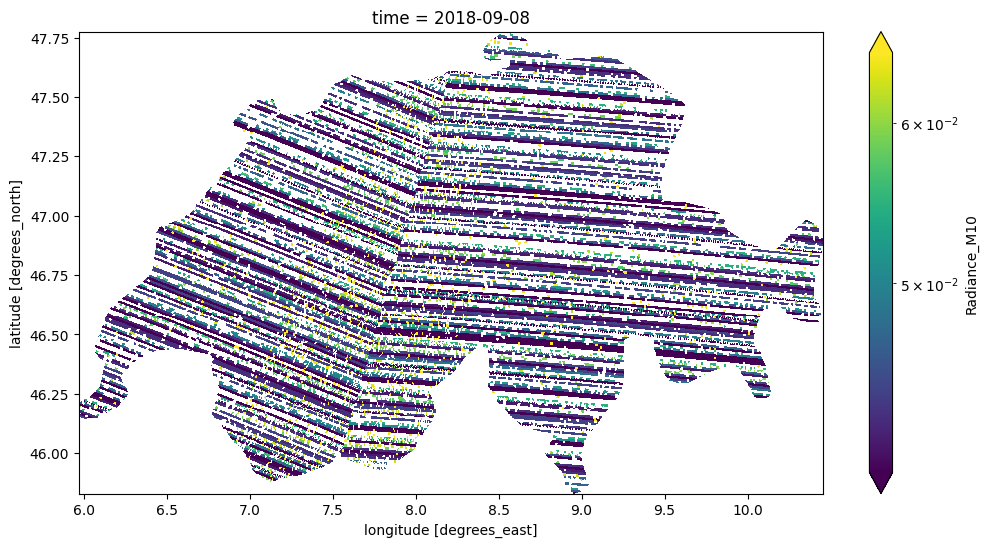

In [26]:
from datetime import date, timedelta

from blackmarble.types import Product
from matplotlib.colors import LogNorm

from lib.admin_areas import get_region_avail_dates, get_region_gdf
from lib.bm import bm_download
from lib.types import VNP46A1_Variable, VNP46A2_Variable

ADMIN_ID = "CHE"
VARIABLE: VNP46A1_Variable | VNP46A2_Variable = "Radiance_M10"

gdf = get_region_gdf(ADMIN_ID)
dates = get_region_avail_dates(ADMIN_ID)

DATE = date.fromisoformat(dates[2]) + timedelta(days=1)
print("Using date:", DATE)

dataset = bm_download(
    gdf,
    DATE,
    product=Product.VNP46A1,
    variable=VARIABLE,
    drop_values_by_quality_flag=[1, 2, 4, 8, 16, 256, 512, 1024, 2048],
)
radiance_m10 = dataset[VARIABLE].sel(time=DATE.isoformat())
pc02, pc98 = radiance_m10.quantile([0.02, 0.98])
# radiance_m10 = radiance_m10.fillna(0)

radiance_m10.plot.pcolormesh(robust=False, figsize=(12, 6), norm=LogNorm(max(pc02, 1e-5), pc98))